# Exploring Simulation Results from the Model
This Jupyter Notebook can be used to generate a variety of graphs from individual simulations and a couple graphs that combine data from across various simulations as well.

Start by importing all the necessary modules, including the python file where the program and graphing functions are kept.

*Note: Be aware that all file locations will need adjustment to match your own personal directory pathways.*

### Debugging
pdb.set_trace() debugging mode will be entered when a worm has negative energy
1. "n" ENTER runs the next line in the program
2. "q" ENTER quits/crashes the program
3. "p" (variable) ENTER prints out the variable
4. "c" ENTER continues running the program

[Debugging in Python](https://pythonconquerstheuniverse.wordpress.com/2009/09/10/debugging-in-python/)

### Code Timer
%load_ext line_profiler

%lprun -f run run(1)

### Getting Help
Use the built-in help features in python to learn more about each function. For example, you may use the following code:

    ?RG.which_gen
    
    help(RG.worm_map)
    
Either of these methods will bring up the documentation for that particular function.

# Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pdb
import pickle
from scipy import stats
import math
import seaborn as sns
import os
import pylab
from ipywidgets import interact
from IPython.core.display import display, HTML
import winsound

In [2]:
import warnings;
warnings.filterwarnings("ignore");

Load in the required packages and the R code extension. Then import the functions from the model and change your working directory if necessary.

In [3]:
%load_ext rpy2.ipython

In [4]:
# os.chdir("YOUR_DIRECTORY_HERE")
import vectorized_RG as RG

Define which experiment to study and the parameter varied. Then find the correct file in your library.

In [5]:
exp = 7  # experiment number
vers = 120  # version number
run = 3  # run number
combination_graph = True  # creates graphs that combine results from across the entire experiment

In [6]:
# change this to whichever parameter is being studied in your experiment
if exp == 4:
    para = "dauer_die"
elif exp == 5:
    para = "food_repop"
elif exp == 6:
    para = "gp_map"
elif exp == 7:
    para = "food_amp"

Set the working directory to wherever your simulation data is stored.

In [7]:
# change this to align with the names of your folders (find the folder for the simulation you want to observe)
os.chdir("experiments/exp_7_official/exp_" + str(exp) + "_version_" + str(vers) + "_run_" + str(run) + "/")

In [8]:
# discover which time points got saved by looking at the file names inside your folder
time_saved = [int(file.split("_")[-1].split(".")[0]) for file in os.listdir() if file.split("_")[0] == "all"]
time_saved.sort()
print(time_saved)

[1, 250, 500, 1000, 1500, 2000, 5000, 10000, 15000, 20000, 25000, 30000]


In [9]:
# import all the data from each time point of your chosen simulation
my_data = [RG.open_pickle(i) for i in time_saved]

# Graphs and Statistics from the Simulation

In [10]:
# discover how many generations have passed
RG.which_gen(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["par"])

This is generation number 193


### Interact Module
There is a wonderful package called [interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) that you can use if you wish to create "interactive" displays.

By setting this parameter "interact_graph" to True, you can view these graphs at each time point saved in the simulation by scrolling on the tool bar. It is a great way to view a lot of this data over time. However, some graphs are slower to generate so they are better looked at side by side rather than using this feature. Hence, this is only set up for some of the faster graphs.

By setting this parameter "interact_graph" to False, you will view this graph just at the last time point in the simulation, unless you specify otherwise.

In [11]:
# set this to True to view interactive graphs that scroll through all time points of the simulation
# set this to False to view a static graph that only displays information from the last saved time point
interact_graph = False

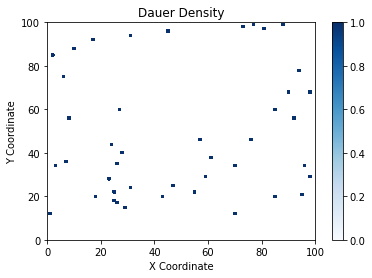

In [12]:
# view a 2D map of the dauer worms on the grid - you can change this to the worm type of your choosing
if interact_graph:
    def worm_map(time=1):
        RG.worm_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"], map_type="dauer")

    interact(worm_map, time=(1,len(time_saved)-1));
else:
    RG.worm_map(my_data[-1]["grid_amt"], my_data[-1]["par"], my_data[-1]["grid_layer"], map_type="dauer")

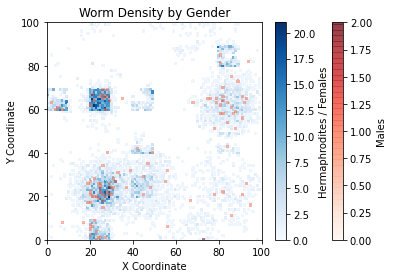

In [13]:
# view a 2D map of the males and females/hermaphrodites on the grid
if interact_graph:
    def gender_map(time=0):
        RG.gender_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

    interact(gender_map, time=(0,len(time_saved)-1));
else:
    RG.gender_map(my_data[-1]["grid_amt"], my_data[-1]["par"], my_data[-1]["grid_layer"])

Note about the above graph : male data is translucent and on top, so it covers over the female data a bit in those locations

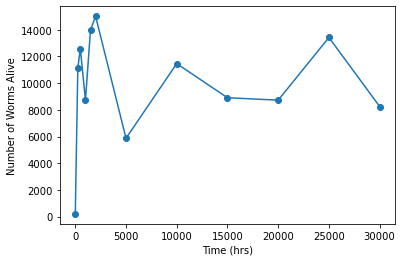

In [14]:
# count how many worms are alive over time
RG.worms_alive(time_saved, my_data)

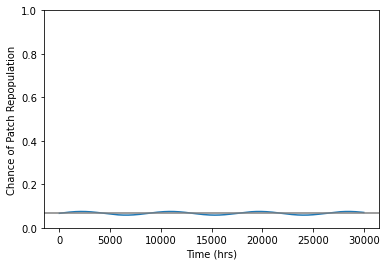

In [15]:
# view the probability of food patch replacement over time
RG.patch_repop(my_data[-1]["par"])

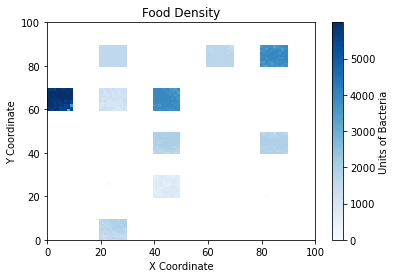

In [16]:
# view a 2D graph of the amount of food in each location of the grid
if interact_graph:
    def food_map(time=0):
        RG.food_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

    interact(food_map, time=(0,len(time_saved)-1));
else:
    RG.food_map(my_data[-1]["grid_amt"], my_data[-1]["par"], my_data[-1]["grid_layer"])

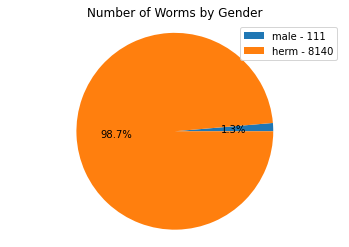

In [17]:
# make a pie chart showing the number of males and females/herms alive at any given time point
if interact_graph:
    def num_gender(time=0):
        RG.num_gender(my_data[time]["par"], my_data[time]["g_to_i"], my_data[time]["p_to_i"], my_data[time]["array"])

    interact(num_gender, time=(0,len(time_saved)-1));
else:
    RG.num_gender(my_data[-1]["par"], my_data[-1]["g_to_i"], my_data[-1]["p_to_i"], my_data[-1]["array"])

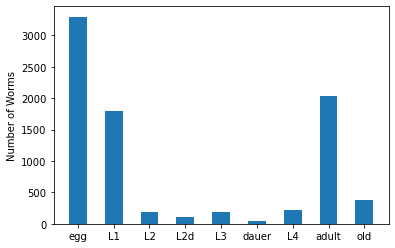

In [18]:
# make a bar graph showing the number of worms alive by stage at any given time point
if interact_graph:
    def num_stage(time=0):
        RG.num_stage(my_data[time]["i_to_s"], my_data[time]["p_to_i"], my_data[time]["array"])

    interact(num_stage, time=(0,len(time_saved)-1));
else:
    RG.num_stage(my_data[-1]["i_to_s"], my_data[-1]["p_to_i"], my_data[-1]["array"])

chance of dying in each stage
L1 : 0.6723885048739406
L2 : 0.14932749452611824
L2d : 0.2537941120545366
L3 : 0.1608037808783819
dauer : 0.9800930578387579
L4 : 0.2107868573084659
adult : 0.8688068834156663


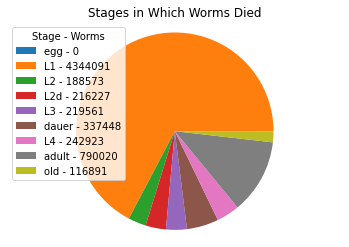

In [19]:
# calculate the fraction of worms that died in each stage and create a pie chart showing how many worms died in each stage
display(HTML("<style>div.output_scroll { height: 30em; }</style>"))
RG.frac_dead(my_data[-1]["i_to_s"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

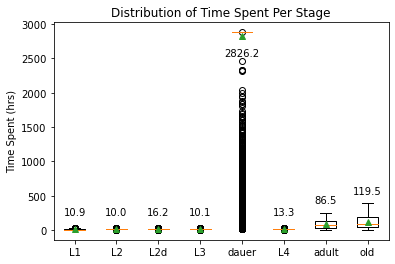

In [20]:
# show boxplots of the distribution of time spent by all worms in each life stage
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))
L2d_avg = RG.stage_time(my_data[-1]["stage_list"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

Notes about the above graph:
- the average time spent in each stage (green triangle) is printed above each box plot
- there is also the option to remove the dauer box by setting exclude_dauer = True

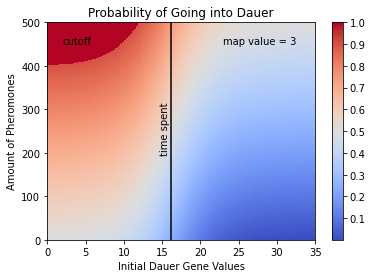

In [21]:
# show a heatmap of the probability a worm will go into dauer based on possible gene values and surrounding pheromones
RG.prob_dauer(my_data[-1]["par"], L2d_avg)

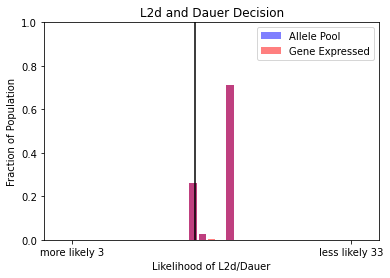

In [22]:
# create a bar graph of the distribution of dauer genes in the population at any given time point
if interact_graph:
    def stats_d(time=0):
        RG.stats_d(my_data[time]["p_to_i"], my_data[time]["array"], my_data[time]["par"], L2d_avg)

    interact(stats_d, time=(0,len(time_saved)-1));
else:
    RG.stats_d(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"], L2d_avg)

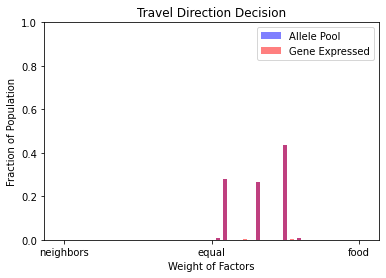

In [23]:
# create a bar graph of the distribution of travel direction genes in the population at any given time point
if interact_graph:
    def stats_s(time=0):
        RG.stats_s(my_data[time]["p_to_i"], my_data[time]["array"])

    interact(stats_s, time=(0,len(time_saved)-1));
else:
    RG.stats_s(my_data[-1]["p_to_i"], my_data[-1]["array"])

Note about the above graph : x axis limits include travel direction genes from 0.25 - 0.75

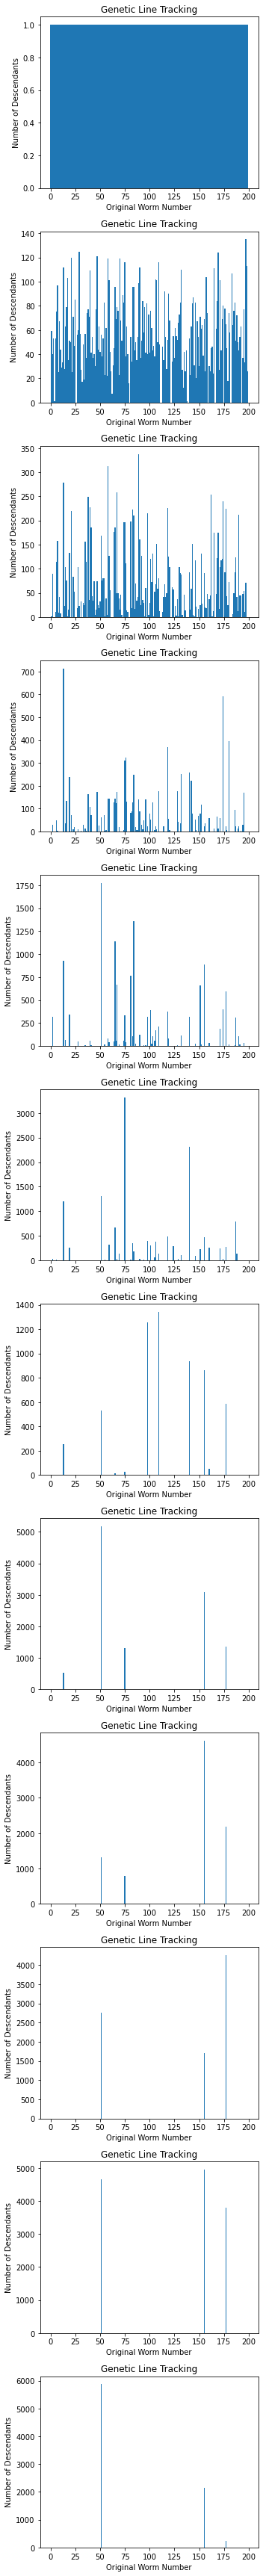

In [24]:
# create a bar graph of the number of descendants of each lineage in the population at any given time point
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.stats_g(my_data[i]["par"], my_data[i]["p_to_i"], my_data[i]["array"])
plt.tight_layout()

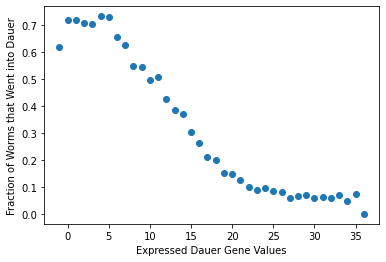

In [25]:
# calculate the fraction of worms that went into dauer based on their expressed dauer gene values
RG.frac_dauer(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

Note about the above graph : fraction of worms that went into dauer = the number of worms that went into dauer / the total number of worms that went into either L3 or dauer

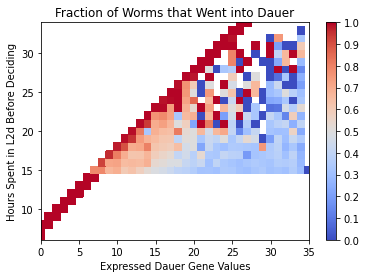

In [26]:
# create a heatmap showing the fraction of worms that went into dauer based on their genes and amount of time spent in L2d
RG.frac_dauer_map(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

Notes about the above graph:
- only includes worms that made it through L2d and not ones that went through L2
- white spaces indicate there are no worms with that combination

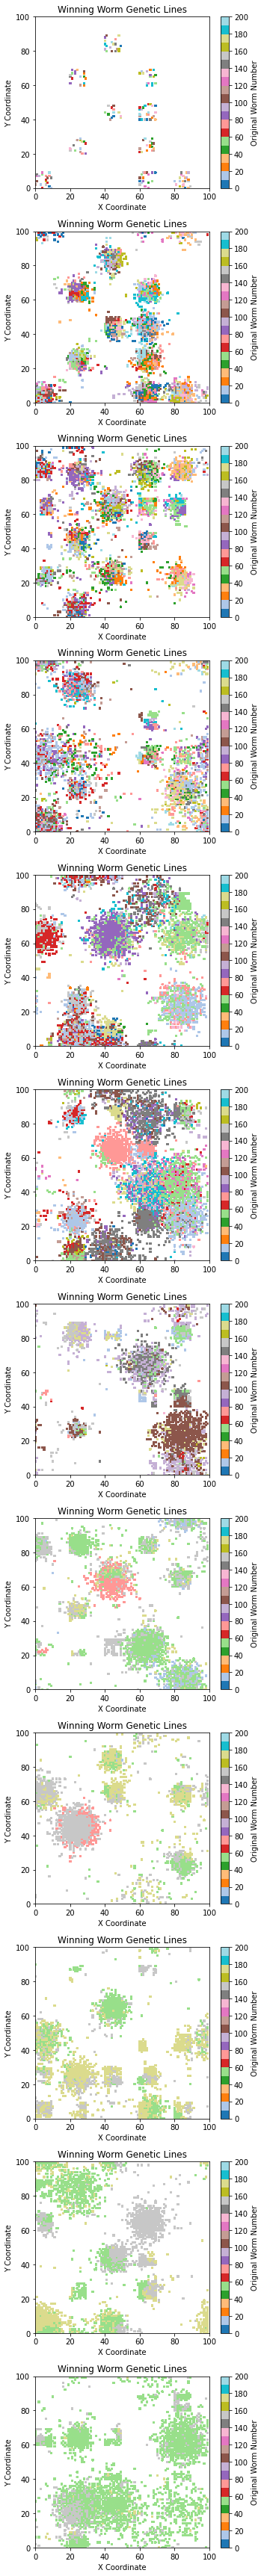

In [27]:
# create a heatmap showing the "winning" genetic lineage in each square of the grid by color
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.genetic_line_map(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

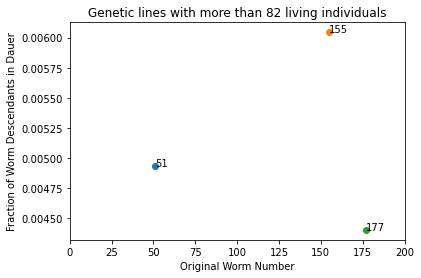

In [28]:
# caculate the fraction of worm descendants in dauer belonging to each genetic lineage
if interact_graph:
    def dauer_line(time=1):
        RG.dauer_line(my_data[time]["array"], my_data[time]["p_to_i"], my_data[time]["s_to_i"], my_data[time]["par"])

    interact(dauer_line, time=(1,len(time_saved)-1));
else:
    RG.dauer_line(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["s_to_i"], my_data[-1]["par"])

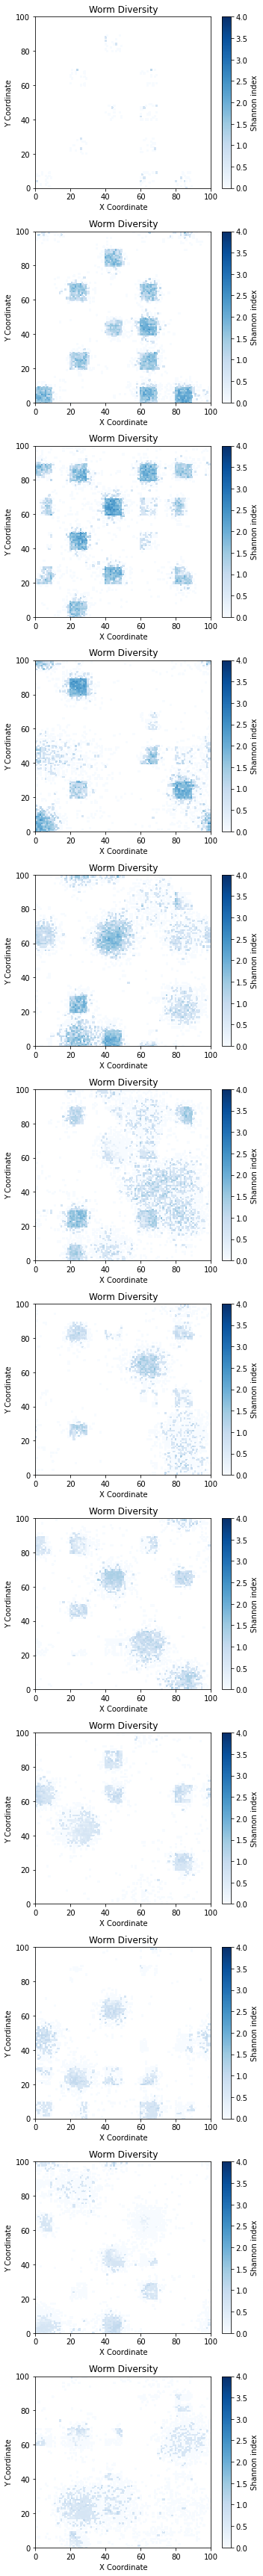

In [29]:
# create a heatmap showing the diversity of genetic lineages in each square of the grid
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.diversity(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

Note about the above graph : the limit of Shannon index values is from 0 to 4

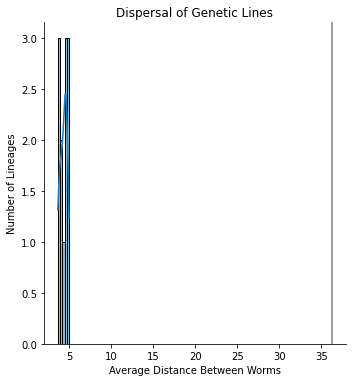

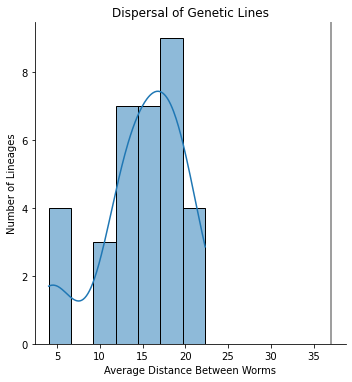

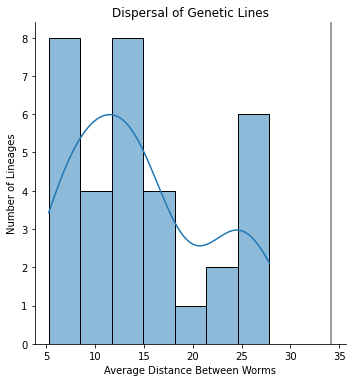

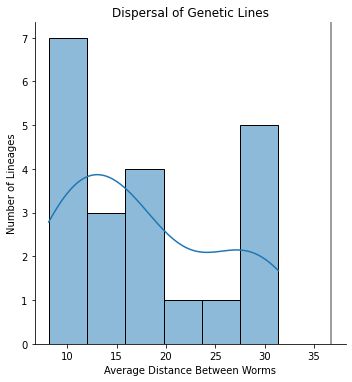

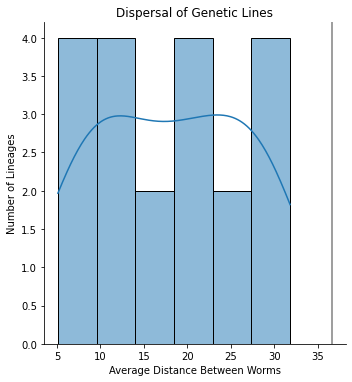

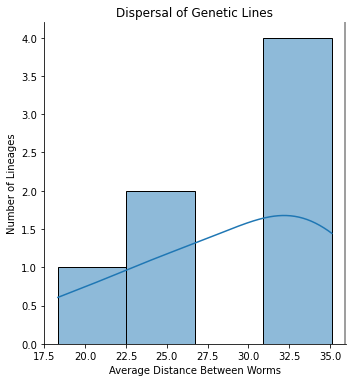

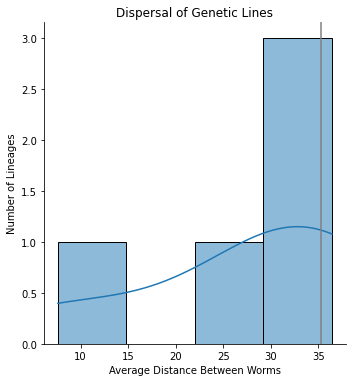

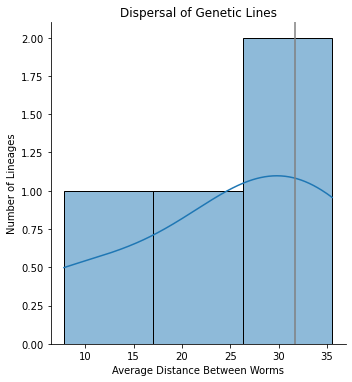

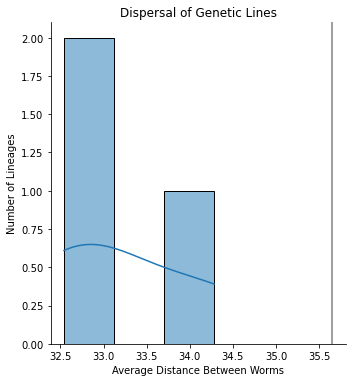

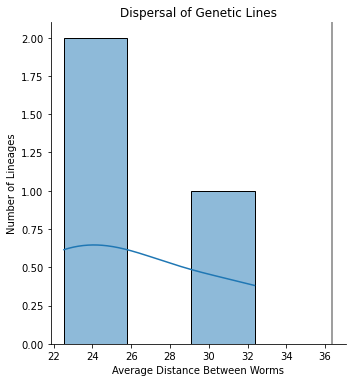

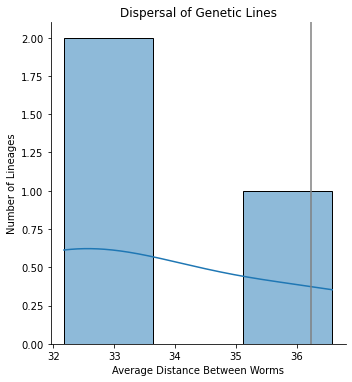

In [30]:
# create a histogram showing the dispersal distribution of all genetic lineages compared to a random sample of worms
for i in range(1,len(time_saved)):
    RG.clump(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])

Note about the above graph : clumpiness of each lineage with more than 1% of living worms vs. clumpiness of a random sample of the population

In [31]:
# print out a table showing some statistics for the winning lineage at each saved time point
RG.winner(time_saved, my_data)

    Time (hrs)  Winning Line  Avg Dauer Gene  Std Dev  Frac of Pop
0            1             0           4.156    0.000        0.005
1          250           197          32.668    0.957        0.012
2          500            89          30.865    2.985        0.027
3         1000            13          24.496    3.649        0.082
4         1500            51          20.075    0.922        0.127
5         2000            75          27.606    6.823        0.221
6         5000           109          34.200    0.022        0.229
7        10000            51          19.556    1.123        0.451
8        15000           155          15.855    0.016        0.517
9        20000           177          17.221    0.216        0.487
10       25000           155          15.855    0.029        0.369
11       30000            51          19.942    0.111        0.712


Note about the above graph : "Avg Dauer Gene" and "Std Dev" are only measuring the genetics of the winning line

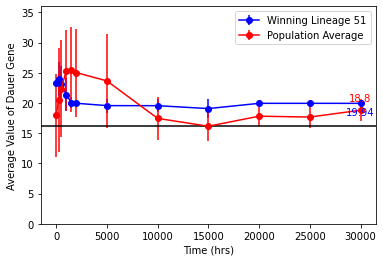

In [32]:
# create a line graph showing the average dauer gene and "winning lineage" dauer gene change over time
RG.dauer_over_time(my_data[-1]["par"], L2d_avg, time_saved, my_data)

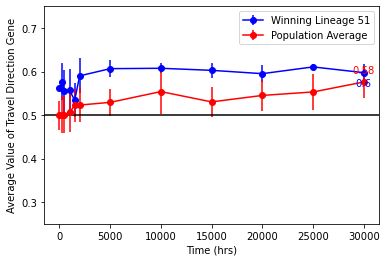

In [33]:
# create a line graph showing the average travel direction gene and "winning lineage" travel direction gene change over time
RG.smell_over_time(time_saved, my_data)

Note about the above graph : y axis limits include travel direction genes from 0.25 - 0.75

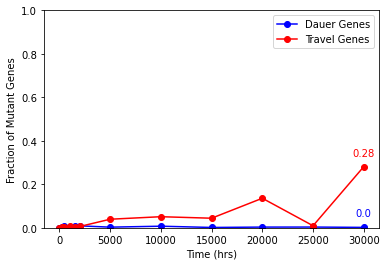

In [34]:
# create a line graph showing the fraction of mutant dauer and travel direction genes in the popualtion over time
RG.mutation(time_saved, my_data)

Notes about the above graph:
- fraction of mutant genes = the number of genes NOT in the original population / the total number of genes
- only look at the genes of living worms

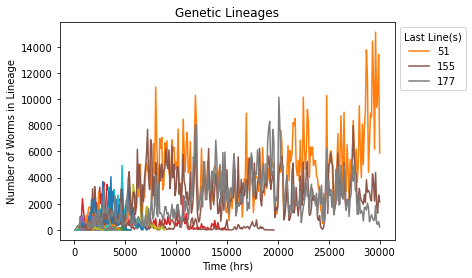

In [35]:
# track the number of worms in each lineage over time (on a higher resolution time scale)
RG.line_track(my_data[-1]["par"])

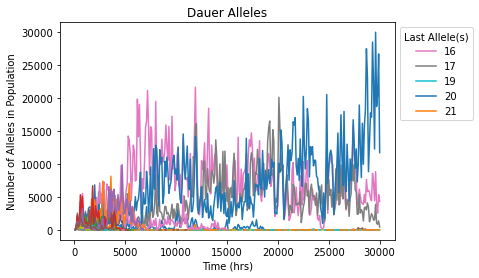

In [36]:
# track the number of each allele present in the population over time (on a higher resolution time scale)
RG.allele_track(my_data[-1]["par"])

Notes about the above graph:
- allele values are rounded to the nearest whole number so they can be sufficiently grouped
- all negative allele values will be changed to zero

### Muller Plots

The following three cells of code are used to create two different muller plots from the simulation. The first cell changes the working directory, the second cell creates the data, and the third cell creates the plots using R code.

*Note: You must also have the language R downloaded for this to work. If you are having difficulty with importing/loading the package rpy2 or using the magic commands, you can also run this code in RStudio to produce the same graphs. You can find the code in the file called muller_code.R (make sure to set the correct working directory in line 2 and the starting population size in line 5). You must still run the python function make_muller (see the second cell below) before you will be able to use this R code file.*

In [37]:
# change this location to the file where you want to store the data for this muller graph
new_loc = "D:/Worms_Life_Sim/muller_plots/"

In [38]:
# put together the csv file needed for creating the muller plots in R
pop_size = my_data[-1]["par"]["pop_size"]
RG.make_muller(pop_size, new_loc)

Use the above function in combination with the R code written below to create the muller plots. Start by setting the correct working directory.

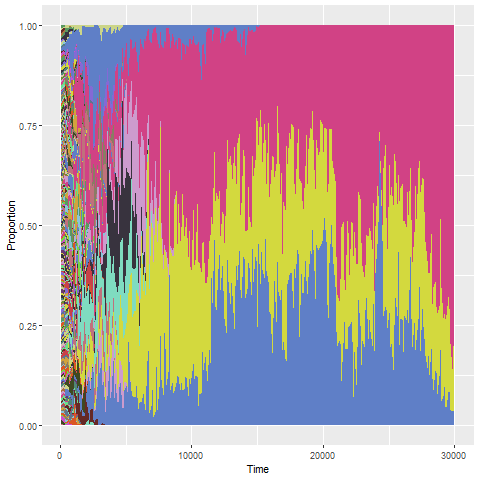

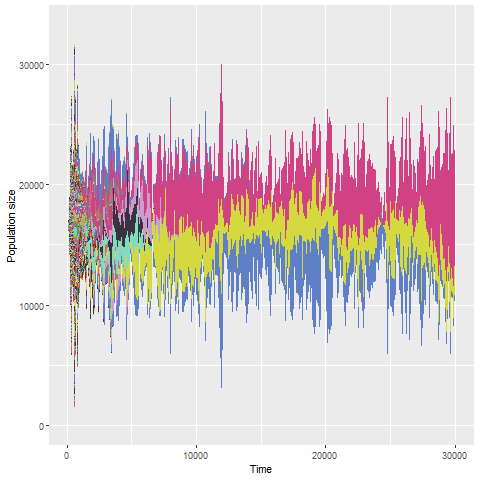

In [39]:
%%R -i pop_size

# set the working directory to wherever you have stored the muller graph data (same as "new_loc" above)
setwd("D:/Worms_Life_Sim/muller_plots/")

# load required packages
suppressMessages(library("ggmuller"))
suppressMessages(library("readr"))
suppressMessages(library("plyr"))
suppressMessages(library("dplyr"))
suppressMessages(library("magrittr"))
suppressMessages(library("ggplot2"))
suppressMessages(library("tidyr"))

# read in the data and define starting values
pop_data = read_csv("lineage_data.csv", col_types=cols(Time=col_integer(),Identity=col_integer(),Population=col_integer()))
start_time = min(pop_data$Time)
start_pop_size = pop_data %>% filter(Time == start_time) %>% pull(Population) %>% sum(.)

# make the edges matrix and add the universal parent
edges = tibble(Parent=pop_size, Identity=unique(pop_data$Identity))
pop_data = rbind.fill(tibble(Time=start_time-0.01, Identity=pop_size, Population=start_pop_size), pop_data)

# create the muller matrix
muller_matrix = get_Muller_df(edges, pop_data)

# create and print the plots
mp = Muller_plot(muller_matrix, add_legend = F, xlab = "Time", ylab = "Proportion")
mpp = Muller_pop_plot(muller_matrix, add_legend = F, xlab = "Time", ylab = "Population size")
print(mp)
print(mpp)

# Graphs from Across Simulations Throughout an Experiment

The remainder of this notebook will create "combination graphs" that combine results across simualtions of a specific experiment. These cells will only run if "combination_graph" is True (see the setting at the beginning of this notebook). You must also change the directory to the folder where multiple simulations for the same experiment are stored.

In [40]:
# change this location to where all your folders for the various simulations are stored for this specific experiment
newer_loc = "D:/Worms_Life_Sim/experiments/exp_7_official/"

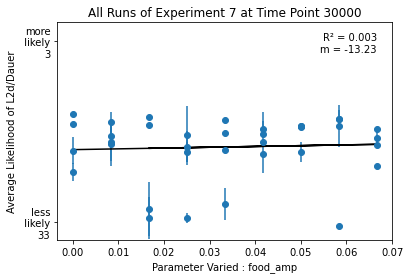

In [41]:
# plot the average resulting dauer gene from each simulation run in the experiment of choice by the parameter varied
if combination_graph:
    RG.combine_results(exp, para, time_saved[-1], newer_loc)

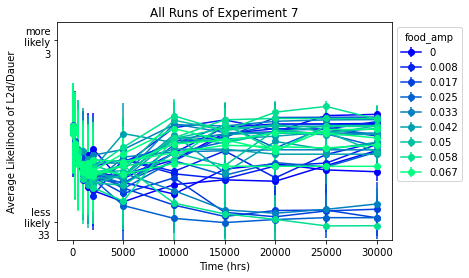

In [42]:
# plot the average dauer genes over time from each simulation run in the experiment of choice by the parameter varied
if combination_graph:
    RG.combine_results_over_time(exp, para, newer_loc)

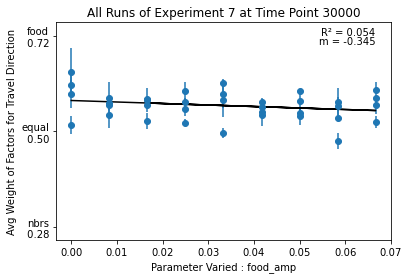

In [43]:
# plot the average resulting travel gene from each simulation run in the experiment of choice by the parameter varied
if combination_graph:
    RG.combine_smell_results(exp, para, time_saved[-1], newer_loc)

In [44]:
# this will beep when the jupyter notebook is done running (it may take a very long time depending on the graphs)
winsound.Beep(1800,500)